# Step 1. Import libraries and load data

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

jeju_card_df = pd.read_csv('../data/jeju_card_english.csv')
jeju_card_df.head()

,Province,City_District,Region_Type,Industry_Type,User_Type,Age_Group,Gender,Year_Month,User_Count,Transaction_Count,Transaction_Amount
0,Jeju-do,Jeju-si,Rural,Entertainment,Jeju_Resident,60s_and_above,F,2018-12,23,29,4240100
1,Jeju-do,Jeju-si,Rural,Entertainment,Jeju_Resident,60s_and_above,M,2018-12,114,190,27414000
2,Jeju-do,Jeju-si,Rural,Entertainment,Jeju_Resident,50s,F,2018-12,52,71,6848000
3,Jeju-do,Jeju-si,Rural,Entertainment,Jeju_Resident,50s,M,2018-12,259,458,91468500
4,Jeju-do,Jeju-si,Rural,Entertainment,Jeju_Resident,40s,F,2018-12,77,99,10021600


# Step 2. Explore and filter the data
- Examine the dataset size, column data types, summary statistics, and whether there are any missing values.
- Filter the dataset to include only data from 2017 and 2018
(2016 was omitted due to incomplete monthly records (Sept–Dec only).)

In [33]:
jeju_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19573 entries, 0 to 19572
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Province            19573 non-null  object
 1   City_District       19573 non-null  object
 2   Region_Type         19573 non-null  object
 3   Industry_Type       19573 non-null  object
 4   User_Type           19573 non-null  object
 5   Age_Group           19573 non-null  object
 6   Gender              19573 non-null  object
 7   Year_Month          19573 non-null  object
 8   User_Count          19573 non-null  int64 
 9   Transaction_Count   19573 non-null  int64 
 10  Transaction_Amount  19573 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.6+ MB


In [34]:
jeju_card_df.describe(include='all')

,Province,City_District,Region_Type,Industry_Type,User_Type,Age_Group,Gender,Year_Month,User_Count,Transaction_Count,Transaction_Amount
count,19573,19573,19573,19573,19573,19573,19573,19573,19573.000000,19573.000000,1.957300e+04
unique,1,2,2,8,2,7,2,28,NaN,NaN,NaN
top,Jeju-do,Jeju-si,Urban,Food_Beverage,Domestic_Tourist,50s,M,2017-10,NaN,NaN,NaN
freq,19573,9852,9858,2688,9807,3376,9795,738,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2987.681347,5980.462525,2.100849e+08
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5331.172895,13623.951410,3.921408e+08
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000e+03
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.000000,371.000000,1.765947e+07
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,972.000000,1376.000000,7.142090e+07
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3169.000000,5710.000000,2.169743e+08


In [35]:
object_columns = jeju_card_df.columns[jeju_card_df.dtypes == 'object']
object_columns

Index(['Province', 'City_District', 'Region_Type', 'Industry_Type',
       'User_Type', 'Age_Group', 'Gender', 'Year_Month'],
      dtype='object')

In [36]:
for col in object_columns:
    print(col)
    print(jeju_card_df[col].unique(), '\n')

Province
['Jeju-do'] 

City_District
['Jeju-si' 'Seogwipo-si'] 

Region_Type
['Rural' 'Urban'] 

Industry_Type
['Entertainment' 'Food_Beverage' 'Accommodation' 'Shopping' 'Retail'
 'Culture_Leisure' 'Transportation' 'Other'] 

User_Type
['Jeju_Resident' 'Domestic_Tourist'] 

Age_Group
['60s_and_above' '50s' '40s' '30s' 'Under_20' '20s' 'Below_20'] 

Gender
['F' 'M'] 

Year_Month
['2018-12' '2018-11' '2018-10' '2018-09' '2018-08' '2018-07' '2018-06'
 '2018-05' '2018-04' '2018-03' '2018-02' '2018-01' '2017-12' '2017-11'
 '2017-10' '2017-09' '2017-08' '2017-07' '2017-06' '2017-05' '2017-04'
 '2017-03' '2017-02' '2017-01' '2016-12' '2016-11' '2016-10' '2016-09'] 



In [37]:
jeju_card_df['Year'] = jeju_card_df['Year_Month'].str.split('-').str[0]
jeju_card_df = jeju_card_df[jeju_card_df['Year'] != '2016']
jeju_card_df.shape

(16707, 12)

# Step 3. Process the data
- Standardize the Age Group Labels: The values '20대미만' and '20 미만' represent the same group but are currently recognized as distinct categories.

In [38]:
jeju_card_df.loc[jeju_card_df['Age_Group'] == 'Below_20', 'Age_Group'] = 'Under_20'
jeju_card_df['Age_Group'].unique()

array(['60s_and_above', '50s', '40s', '30s', 'Under_20', '20s'],
      dtype=object)

# Step 4. Analyse the data
- 연월별 카드 소비 비교하기
- 연령대별 카드 소비 비교하기

In [39]:
groupby_ym = jeju_card_df.groupby('Year_Month').sum(numeric_only=True).reset_index()
groupby_ym

,Year_Month,User_Count,Transaction_Count,Transaction_Amount
0,2017-01,2044697,3962878,158062633602
1,2017-02,1937989,3686906,142673272629
2,2017-03,2139087,4265024,158170622304
3,2017-04,2261037,4428571,164145266282
4,2017-05,2422539,4744952,174450463090
5,2017-06,2328383,4606602,166023890619
6,2017-07,2520117,5048178,177270011408
7,2017-08,2634037,5212389,178853518885
8,2017-09,2374142,4765159,168355520204
9,2017-10,2270758,4453613,164810287642


Text(0, 0.5, 'Amount (in 100M KRW)')

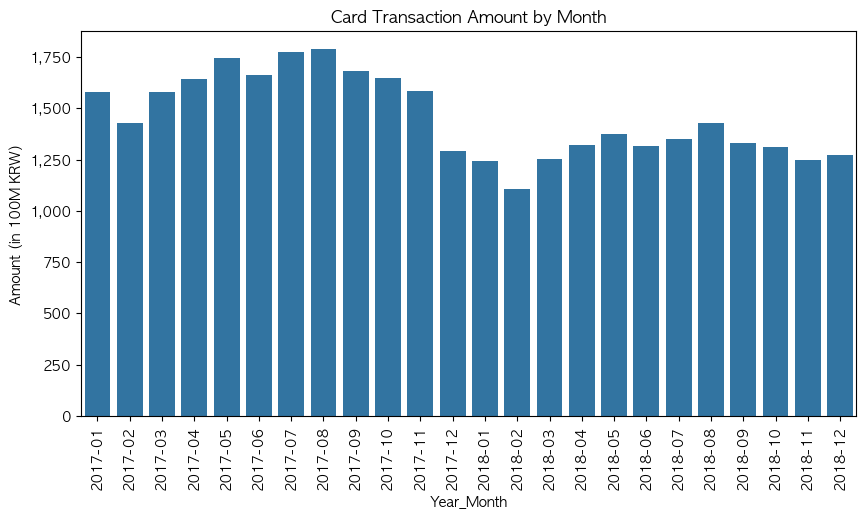

In [40]:
sns.barplot(data=groupby_ym, x='Year_Month', y='Transaction_Amount')
plt.rcParams['figure.figsize'] = (10, 5)
plt.xticks(rotation=90)
plt.title('Card Transaction Amount by Month')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('Amount (in 100M KRW)')

### Key Findings
- in general, there are more card usage during spring and summer than winter
2017년과 2018년 모두 겨울에는 이용 금액이 감소하고, 봄과 여름철에 카드 이용 금액이 증가하는 경향, 추운 겨울보다는 날씨가 온화한 봄이나 여름휴가철에 관광객들의 유입도 많고, 이에 따라 카드 소비도 많아지기 때문
-  Compared to 2017, the amount spent in 2018 in general is less than 2017, none of 
2017년과 비교해서 2018년에 전체적으로 이용금액이 줄어듦, 2017년과 달리 2018년에는 월별 이용 금액이 가장 많을 때에도 1,500억 원을 넘기지 못하고 있음

In [42]:
group_ym_age = jeju_card_df.groupby(['Year', 'Age_Group']).sum(numeric_only=True).reset_index()
group_ym_age

,Year,Age_Group,User_Count,Transaction_Count,Transaction_Amount
0,2017,20s,4800559,9304114,208175160124
1,2017,30s,7080363,13499213,437721213544
2,2017,40s,6965143,14414930,561248406540
3,2017,50s,5158034,10314259,468286978356
4,2017,60s_and_above,2640430,5069478,260136246561
5,2017,Under_20,203078,429896,4996657612
6,2018,20s,4262563,8714136,175770246392
7,2018,30s,5759053,11372820,320955678476
8,2018,40s,6081331,12925032,442123304148
9,2018,50s,4646069,9557381,387615338975


In [43]:
jeju_card_df['Age_Group'] = pd.Categorical(jeju_card_df['Age_Group'],
                                      categories=['Under_20', '20s', '30s', '40s', '50s', '60s_and_above'],
                                      ordered=True)

Text(0, 0.5, 'Amount (in 100M KRW)')

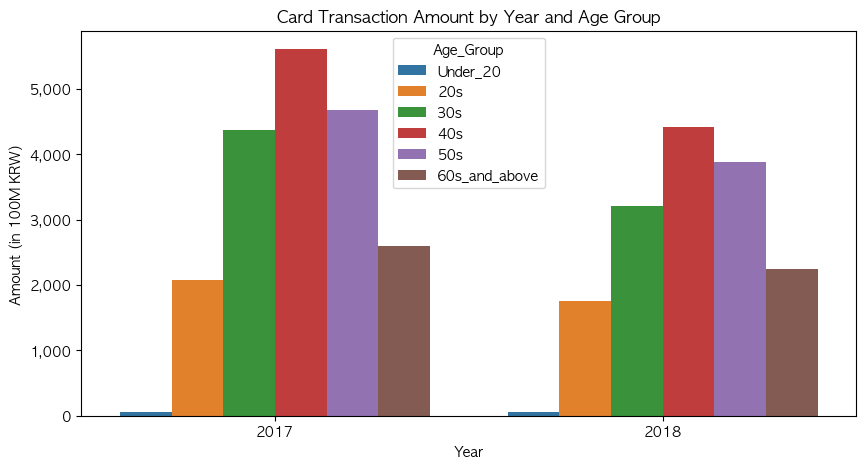

In [45]:
age_order = ['Under_20', '20s', '30s', '40s', '50s', '60s_and_above']

sns.barplot(data=group_ym_age, x='Year', y='Transaction_Amount', hue='Age_Group', hue_order=age_order)
plt.title('Card Transaction Amount by Year and Age Group')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/100000000:,.0f}'))
plt.ylabel('Amount (in 100M KRW)')

In [ ]:
Key Findings
- 이용 금액이 더 많이 감소한 연령대는 없고, 그냥 전체적으로 이용금액이 줄어듬

데이터 분석
- 연월별 카드 이용 추이를 비교
2017년과 2018년, 두 연도 사이에 어떤 차이가 있나요? 왜 그런 차이가 나는지도 한번 확인해 보세요.
- 연령대별로 카드 이용에 어떤 차이가 있는지 비교해 보세요.
이용자수, 소비금액, 1회당 소비금액을 비교해 보세요.
연령대별로 어떤 업종에 많은 금액을 지출하는지 확인해 보세요.
연령대별로 연월별 카드 이용 추이를 확인해 보세요.
- 더 알아보고 싶은 게 있다면 원하는 대로 자유롭게 데이터를 탐색해 보세요!

In [11]:
yearly_summary = (
    jeju_df
    .groupby(jeju_df['year'])
    .agg(
        이용자수=('이용자수', 'sum'),
        소비금액=('이용금액', 'sum'),
        평균결제금액=('이용금액', 'mean')
    )
)


In [31]:
import pandas as pd

# 1. 데이터 불러오기
df = pd.read_csv('../data/jeju_card.csv')

# 2. 컬럼명(Header) 번역 맵핑
column_map = {
    '시도명': 'Province',
    '시군구명': 'City_District',
    '지역구분': 'Region_Type',
    '업종명': 'Industry_Type',
    '이용자 구분': 'User_Type',
    '연령대': 'Age_Group',
    '성별': 'Gender',
    '연월': 'Year_Month',
    '이용자수': 'User_Count',
    '이용횟수': 'Transaction_Count',
    '이용금액': 'Transaction_Amount'
}

# 3. 데이터 값(내용물) 번역 맵핑
value_map = {
    '시도명': {'제주도': 'Jeju-do'},
    '시군구명': {'제주시': 'Jeju-si', '서귀포시': 'Seogwipo-si'},
    '지역구분': {'읍면': 'Rural', '도심': 'Urban'},
    '업종명': {
        '유흥': 'Entertainment',
        '식음료': 'Food_Beverage',
        '숙박': 'Accommodation',
        '쇼핑': 'Shopping',
        '소매': 'Retail',
        '문화/레져': 'Culture_Leisure',
        '교통': 'Transportation',
        '기타': 'Other'
    },
    '이용자 구분': {'제주도민': 'Jeju_Resident', '내국인관광객': 'Domestic_Tourist'},
    '연령대': {
        '60대이상': '60s_and_above',
        '50대': '50s',
        '40대': '40s',
        '30대': '30s',
        '20대': '20s',
        '20대미만': 'Under_20',
        '20 미만': 'Below_20'
    },
    '성별': {'여': 'F', '남': 'M'}
}

# 4. 변환 적용
# 먼저 내용물(값)을 바꿉니다.
for col, mapping in value_map.items():
    df[col] = df[col].replace(mapping)

# 그 다음 컬럼명을 영어로 바꿉니다.
df_en = df.rename(columns=column_map)

# 5. 영문판 파일로 저장
# utf-8-sig로 저장해야 엑셀에서 열었을 때 글자가 깨지지 않습니다.
df_en.to_csv('jeju_card_english_full.csv', index=False, encoding='utf-8-sig')

print("모든 데이터 내용이 영어로 변환되어 'jeju_card_english_full.csv'로 저장되었습니다!")

모든 데이터 내용이 영어로 변환되어 'jeju_card_english_full.csv'로 저장되었습니다!
